Mean Squared Error (MSE): 127.6505250011255
R-squared (R²): 0.841831772746297


C:\Users\pmall\AppData\Local\Temp\ipykernel_12936\3978947869.py:62: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  plt.xticks(np.arange(min(X), max(X)+1, 1.0), rotation=45)


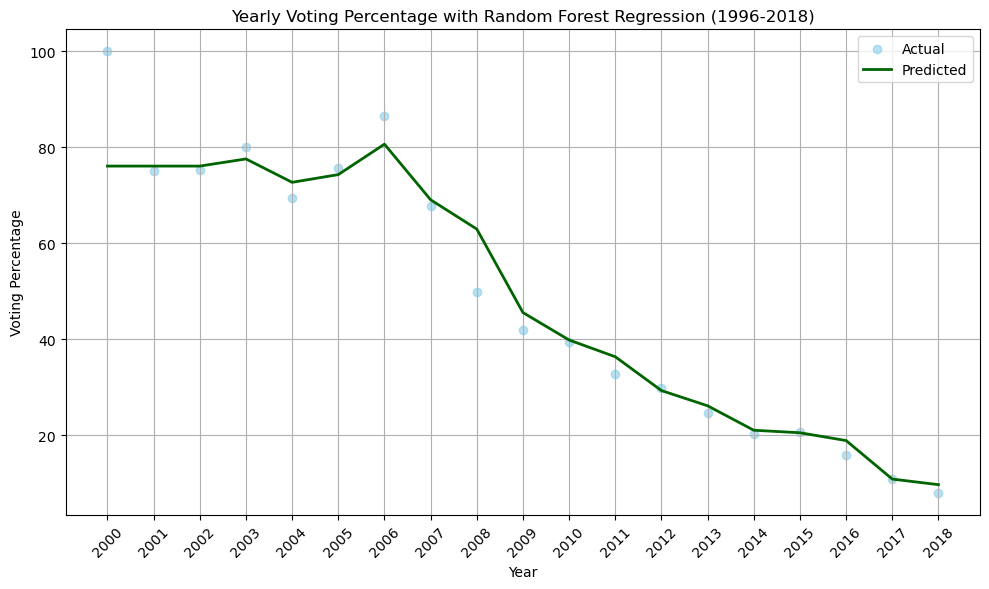

In [1]:
#  Random forest regression for the voting percentage from 1996 to 2018

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import seaborn as sns

# Assuming 'df' is your DataFrame after loading the JSON data
df = pd.read_json('C:/USD/ms-aai-501-final-project/data/Software_5-core.json', lines=True)

# Convert 'unixReviewTime' to datetime and extract year
df['reviewDate'] = pd.to_datetime(df['unixReviewTime'], unit='s')
df['reviewYear'] = df['reviewDate'].dt.year

# Ensure 'vote' is numeric and fill missing with 0
df['vote'] = pd.to_numeric(df['vote'], errors='coerce').fillna(0)

# Filter reviews between 2000 and 2018
filtered_df = df[(df['reviewYear'] >= 1996) & (df['reviewYear'] <= 2018)]

# Calculate yearly voting percentage
yearly_votes = filtered_df.groupby('reviewYear').apply(lambda x: (x['vote'] > 0).mean() * 100).reset_index(name='votingPercentage')

# Preparing data for Random Forest Regressor
X = yearly_votes['reviewYear'].values.reshape(-1, 1)
y = yearly_votes['votingPercentage'].values

# Splitting data into training and testing sets for demonstration purposes
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initializing and training the Random Forest Regressor
regressor = RandomForestRegressor(n_estimators=100, random_state=42)
regressor.fit(X_train, y_train)

# Predicting over the entire dataset to plot
y_pred = regressor.predict(X)

from sklearn.metrics import mean_squared_error, r2_score
# Predicting the test set results
y_pred_test = regressor.predict(X_test)

# Calculating the Mean Squared Error (MSE) and R-squared (R²) metrics
mse = mean_squared_error(y_test, y_pred_test)
r2 = r2_score(y_test, y_pred_test)

print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R²): {r2}")

# Plotting the actual vs predicted voting percentages
plt.figure(figsize=(10, 6))
plt.scatter(X, y, color='skyblue', label='Actual', alpha=0.6)
plt.plot(X, y_pred, color='darkgreen', label='Predicted', linewidth=2)

plt.title('Yearly Voting Percentage with Random Forest Regression (1996-2018)')
plt.xlabel('Year')
plt.ylabel('Voting Percentage')
plt.legend()
plt.grid(True)
plt.xticks(np.arange(min(X), max(X)+1, 1.0), rotation=45)
plt.tight_layout()
plt.show()